# Capítulo 4 -Distribuições de probabilidades

As probabilidades desempenham um papel crítico nas decisões de investimento. Embora não possamos
prever o futuro, as decisões de investimento informadas são baseadas em algum tipo de probabilidade,
trabalhando com variáveis aleatórias. Uma distribuição de probabilidade especifica as probabilidades
associadas com os resultados possíveis de uma variável aleatória.

## Variáveis aleatórias

Uma variável aleatória é uma quantidade cujos resultados futuros são incertos (ex: os retornos de
uma acção). Os dois mais básicos tipos de variáveis aleatórias são variáveis aleatórias discretas e
variáveis aleatórias contínuas.

### Variáveis aleatórias discretas

Uma variável aleatória discreta pode assumir no máximo um número contável (possivelmente infinito)
número de valores possíveis. O volume de uma acção é um exemplo de uma variável aleatória discreta.
É um número "contável".

### Variáveis aleatórias contínuas

Por outro lado, não podemos contar os resultados de uma variável aleatória contínua. A taxa de
retorno de um investimento é um exemplo de uma variável aleatória contínua. Pode assumir qualquer
valor numa sequência. Tanto pode ser 1.0% como 1.0001% e qualquer número entre eles (infinitos).

## Distribuições de probabilidade

Cada variável aleatória está associada a uma distribuição de probabilidade que descreve
completamente a variável. Podemos visualizar uma distribuição de probabilidade de duas maneiras. O
básico é a função de probabilidade, que especifica a probabilidade de que o variável assume um valor
específico (em inglês Probability density function ou pdf). Podemos, também, usar a função de
distribuição acumulativa, que nos dá a probabilidade de que uma variável aleatória X seja menor ou
igual a um determinado valor x, P(X ≤ x) (em inglês cumulative density function ou cdf).

### Distribuição Uniforme Discreta

A mais simples de todas as distribuições é a distribuição uniforme discreta. A distribuição tem um
número finito de possibilidades e todas as possibilidades têm a mesma probabilidade.

Tabela de Probabilidade para um dado. 6 possibilidades, cada uma delas com a mesma probabilidade:

![](https://s3.us-east-2.amazonaws.com/cbs.pg.repository/img/capitulo_04/capitulo_4_tabela_1.PNG)

#### Características do pdf

$ 0 \le p(x) \le 1 $

Soma das probabilidades é 1

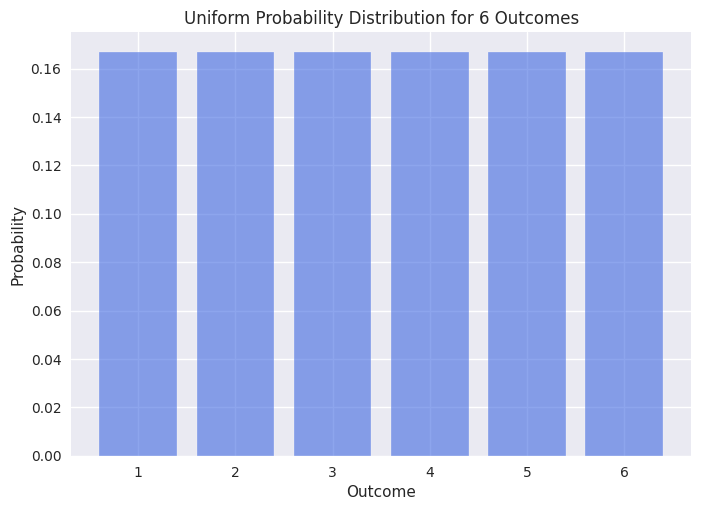

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Set the style of seaborn
sns.set_style("darkgrid")

# Number of bars
num_bars = 6

# Use a uniform distribution to generate the probabilities
probabilities = np.full(num_bars, 1/num_bars)

# Create bar chart with the probabilities
plt.bar(range(1, num_bars + 1), probabilities, alpha=0.6, color='royalblue')

# Set labels and title with a seaborn-like aesthetic
plt.xlabel('Outcome')
plt.ylabel('Probability')
plt.title('Uniform Probability Distribution for ' + str(num_bars) + ' Outcomes')

# Show the plot with seaborn style
plt.show()

#### Características do cdf

-   $0\le F(x) \le 1$
-   À medida que aumentamos $x$ o cdf aumenta ou mantém-se constante (por ser acumulativa nunca pode
    descer)

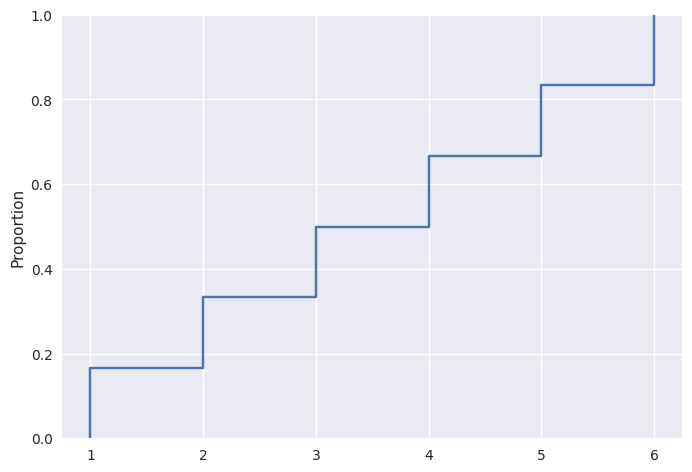

In [46]:
import scipy
from scipy import stats
import numpy as np

def compute_uniform_cdf(min_value, max_value, step=1):
    return scipy.stats.uniform.cdf(np.arange(min_value+1, max_value+2, step), min_value, max_value)

data = compute_uniform_cdf(1, 6)

# Assuming the data is a simple range from 1 to 6, since the ECDF plot indicates
# discrete steps which might suggest each number from 1 to 6 appears once.
# Prepare data
data = pd.Series(range(1, 7))

# Create ECDF plot
sns.ecdfplot(data=data)

# Show the plot
plt.show()

Usando as funções para calcular os valores do quadro:

**Função Probabilidade**

Como numa distribuição uniforme todos os eventos têm a mesma probabilidade podemos calcular
$P(E) = \frac{1}{N}$, onde E é o evento e N o número de possibilidades. Neste caso
$P(QualquerNúmeroDoDado) = \frac{1}{6}$

**Função de distribuição acumulativa**

<div class="alert alert-block alert-info"><b>Questão:</b>

Para um distribuição normal de 20 possibilidades (números inteiros de 1 a 20) qual é a
probabilidade de X ser maior ou igual a 3 mas menor ou igual a 5 ($P(3\geq X \le 5)$)?

Para calcularmos a probabilidade entre valores podemos calcular a soma das probabilidades entre
esses valores:

</div>

Criando as funções python para a distribuição uniforme discreta:

In [47]:
import scipy
from scipy import stats
import numpy as np

def compute_uniform_pdf(min_value, max_value, step=1):
    return scipy.stats.uniform.pdf(np.arange(min_value, max_value+1, step), min_value, max_value)[0]

def compute_uniform_cdf(min_value, max_value, step=1):
    return scipy.stats.uniform.cdf(np.arange(min_value+1, max_value+2, step), min_value, max_value)

In [48]:
np.round(compute_uniform_pdf(min_value=1, max_value=6, step=1), 4)

np.float64(0.1667)

In [49]:
np.round(compute_uniform_cdf(min_value=1, max_value=6, step=1), 4)

array([0.1667, 0.3333, 0.5   , 0.6667, 0.8333, 1.    ])

Podemos fazer a soma das 3 probabilidades individuais:

In [50]:
compute_uniform_pdf(min_value=1, max_value=20, step=1) * 3

np.float64(0.15000000000000002)

ou $P(X \le 5) - P(X \le 2)$

In [51]:
compute_uniform_cdf(min_value=1, max_value=20, step=1)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [52]:
# Lembrem-se que python começa a contar desde o zero
compute_uniform_cdf(min_value=1, max_value=20, step=1)[4] - compute_uniform_cdf(min_value=1, max_value=20, step=1)[1]

np.float64(0.15)

### Distribuição Binomial

Em muitos contextos de investimento podemos ver os resultados de forma binária, sucesso ou perda,
subida ou queda. Esta forma de vermos as coisas vai-nos ajudar nos cálculos e é a base de preço de
opções (e da origem à árvore de probabilidades que calculamos no capítulo 3).

A base da distribuição binomial é aquilo a que chamamos tentativa de bernoulli. Uma tentativa de
bernoulli é um binomial, os resultados são exclusivamente sucesso ou fracasso, cara ou coroa, 1 ou
0.

Assim sendo a função probabilidade de uma tentativa de Bernoulli é:

-   P(1) = p
-   P(0) = 1-p (o inverso)

onde p é a probabilidade de sucesso

#### Características

-   A probabilidade p, se sucesso, é constante para todas as tentativas;
-   As tentativas são independentes;
-   No caso de p ser 0.5 a distribuição binomial vai ser simétrica (como a distribuição normal).

Para definirmos uma distribuição binomial precisamos por isso de duas variáveis, p, a probabilidade
de sucesso e n, o números de tentativas.

**Distribuições em python usando o numpy random:** https://deepnote.com/@luisilva/Distribuicoes-c1aa98e2-11b8-4472-ac99-5f4f80f0f7c7

#### Exemplo

Um tipo de distribuição binomial muito usada é sucesso caso a acção suba e fracasso caso a acção
desça. Sabendo p e n podemos calcular as probabilidades dos movimentos e caminhos que o preço da
acção pode tomar. Exemplo coo 4 passos/eventos.

![](https://s3.us-east-2.amazonaws.com/cbs.pg.repository/a_binomial_model_of_stock_prices.png)

![](https://s3.us-east-2.amazonaws.com/cbs.pg.repository/binomial_4_passos.png)

**Como calcular o número de caminhos possíveis?**

Não é mais do que calcular pares ordenados usando Combinações.

In [53]:
from sympy.functions.combinatorial.numbers import nC, nP

tentativas = 4
movimentosDeSubida = 0

nC(tentativas,movimentosDeSubida)

1

In [54]:
tentativas = 4
movimentosDeSubida = 3

nC(tentativas,movimentosDeSubida)

4

**Como calcular a probabilidade individual de cada caminho?**

Não é mais do que P(E) = 1/N, sendo N a quantidade de caminhos possíveis.

In [55]:
float(1/(nC(5,0) + nC(4,1) + nC(4,2) + nC(4,3) + nC(4,4) + nC(4,5)))

0.0625

**Como calcular as probabilidades**

Criando as fórmulas em python:

In [56]:
# Referência: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

def compute_binomial_pmf(p, n, k):
    '''
    p = probabilidade de sucesso
    n = número de tentativas
    k = número de sucessos
    '''
    return scipy.stats.binom.pmf(p=p, n=n, k=k)

def compute_binomial_cdf(p, n, k):
    '''
    p = probabilidade de sucesso
    n = número de tentativas
    k = número de sucessos
    '''
    return scipy.stats.binom.cdf(p=p, n=n, k=k)

Probabilidade de cada evento

In [57]:
compute_binomial_pmf(p=0.5, n=4, k=2)

np.float64(0.375)

Probabilidades cumulativas

In [58]:
compute_binomial_cdf(p=0.5, n=4, k=2)

np.float64(0.6875)

**Como calcular a variância e desvio padrão??**

Criando as fórmulas em python:

In [59]:
def compute_binomial_var(p, n):
    '''
    p = probabilidade de sucesso
    n = número de tentativas
    '''
    return scipy.stats.binom.var(p=p, n=n)

def compute_binomial_std(p, n):
    '''
    p = probabilidade de sucesso
    n = número de tentativas
    '''
    return scipy.stats.binom.std(p=p, n=n)

Nos últimos 10 anos a empresa Y aumentou a facturação anual 7 vezes. Se decidirmos modelar os
aumentos de facturação da próxima década usando uma distribuição binomial:

A)  Qual a probabilidade de aumentar a facturação em cada ano?

$ P(af) = 7/10 $

B)  Qual a probabilidade de a facturação aumentar exactamente 5 dos 10 anos

In [60]:
compute_binomial_pmf(p=0.7, n=10, k=5)

np.float64(0.10291934519999998)

C)  Calcule a variância e o desvio padrão da distribuição

Variância:

In [61]:
compute_binomial_var(0.7, 10)

np.float64(2.1000000000000005)

Desvio padrão:

In [62]:
compute_binomial_std(0.7, 10)

np.float64(1.449137674618944)

### Distribuição Uniforme Contínua

Se na secção anterior consideramos variáveis aleatórias discretas, que por definição são
"contáveis", vamos agora considerar variáveis aleatórias contínuas, que não são "contáveis".

Tal como na distribuições de variáveis discretas a a distribuição uniforme é a mais simples de
entender e prova ser um bom ponto de início.

Quando estávamos a trabalhar com variáveis aleatórias discretas conseguíamos atribuir uma
determinada probabilidade a cada evento. Com variáveis aleatórias contínuas tal não vai ser
possível, pois há uma infinidade de eventos. Por isso a probabilidade de cada valor específico é de
0.

Iremos por isso apenas trabalhar com o CDF, a função de distribuição acumulativa.

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')

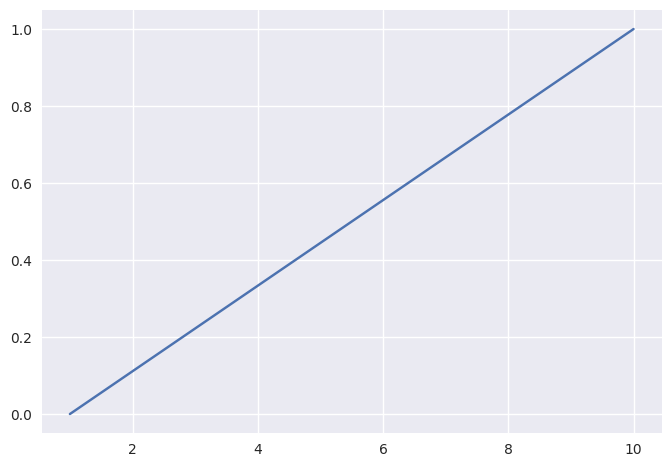

In [64]:
sns.lineplot(x=[1, 10], y=[0, 1]);

**O vamos precisar de saber:**

-   O CDF da distribuição uniforme contínua (tal como na versão discreta) sobe linearmente;
-   A probabilidade de cada ponto discreto é 0;
-   A probabilidade acumulativa continua a ser entre 0 e 1;
-   A probabilidade acumulativa entre dois pontos é a probabilidade acumulativa do ponto à mais à
    direita menos a probabilidade acumulativado ponto mais à esquerda: $4 \le X \le 6 = F(6) - F(4)$


<div class="alert alert-block alert-info"><b>Questão</b>

Estamos a tentar prever as vendas de uma companhia no quarto trimestre do ano fiscal. As nossas
estimativas estão entre 14 mil e 15 mil euros de vendas. Decidimos tratar todas as possibilidades
como tendo a mesma probabilidade e por isso usamos a distribuição uniforme contínua.

1) Qual é o retorno médio esperado?
2) Qual é a probabilidade de a empresa ter 14.125 euros ou menos em vendas no quarto trimestre?
3) Qual a probabilidade de as vendas serem entre 14250 e 14625 euros?
</div>

**Resolução**

CDF

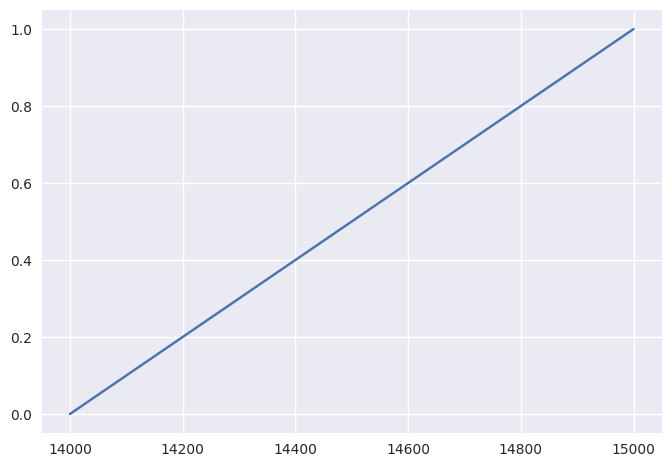

In [65]:
sns.lineplot(x=[14000, 15000], y=[0, 1]);

**A.** Qual é o retorno médio esperado?

O retorno médio esperado numa distribuição uniforme contínua é a média aritmética entre o valor
mínimo e máximo. $\frac {15000+14000} {2} = 14500$

**B.** Qual é a probabilidade de a empresa ter 14.125 euros ou menos em vendas no quarto trimestre?

A probabilidade da empresa ter 14.125 pode ser calculado com recurso à nossa fórmula
compute_uniform_cdf_continuous() que calcula a probabilidade acumulada da distribuição até ao ponto
desejado

In [66]:
def compute_uniform_cdf_continuous(min_value, max_value, value):
    if value < max_value and value > min_value:
        return (value - min_value)  / (max_value - min_value)
    else:
        return ("Error: value is probably not betwwen the min and max values")

compute_uniform_cdf_continuous(14000, 15000, 14125)

0.125

**C.** Qual a probabilidade de as vendas serem entre 14250 e 14625 euros?

In [67]:
F_14750 = compute_uniform_cdf_continuous(14000, 15000, 14625)
F_14250 = compute_uniform_cdf_continuous(14000, 15000, 14250)

F_14750 - F_14250

0.375

## Distribuição Normal

A distribuição normal é possivelmente a distribuição de probabilidade mais usada em trabalho
quantitativo. Desempenha um papel importante em Modern Portfolio Theory e em gestão de risco. Por
ter tantos usos, a distribuição normal deve ser completamente compreendido pelos profissionais de
investimento.

O papel da distribuição normal na inferência estatística e na análise de regressão é amplamente
estendido por um resultado crucial conhecido como o teorema do limite central. A Central O teorema
do limite afirma que a soma (e a média) de um grande número de variáveis (com variância finita) é
aproximadamente normalmente distribuída.

### Características

A distribuição normal:

-   é completamente descrita por dois parâmetros - a sua média ($\mu$) e a sua variância ($\sigma$);
-   é simétrica e em formato de sino;
-   tem uma assimetria (Skewness) de 0;
-   tem uma curtose (Kurtosis ) de 3, e/ou uma curtose em excesso de 0;
-   tem média, mediana e moda iguais;

### Distribuição univariada e multivariada

Uma *distribuição univariada* descreve apenas uma variável aleatória (os retornos de uma acção). Por
outro lado uma *distribuição multivariada* especifica a probabilidade de um grupo de de variáveis
aleatórias relacionadas (o retorno de um portefólio de 20 acções).

Neste último caso temos não só de tomar em consideração cada variável aleatória individual mas
também toda as relações estatística entre elas (no caso de um portefólio de acções teremos de ter em
consideração as covariâncias entre as acções).

Uma distribuição normal multivariada é assim definida por 3 listas de parâmetros:

-   Uma lista dos retornos médios de cada variável aleatória;
-   Uma lista das variâncias;
-   Uma lista de todas as covariâncias entre as variáveis aleatórias.

## Distribuição normal standard

Há tantas distribuições normais quantas combinações de diferentes médias ($\mu$) e variâncias
($\sigma$). Mas devido às características da distribuição normal é comum trabalharmos só com a
distribução normal standard. A distribuição normal standard é uma distribuição normal com um desvio
padrão de 1 e uma média de 0.

Quando temos que trabalhar com outras distribuições normais o procedimento que tomamos é
standartizar essa distribuição, de forma a trabalhar com ela como se tivesse sido um standard desde
o início.

Embora não podendo levar de uma forma literal e sendo apenas uma forma aproximada a distribuição
normal é comummente usada como a distribuição para os retornos de um activo ou portefólio. Um desvio
da normalidade na maioria dos retornos de acções é que na realidade a distribuição dos retornos tem
um curtose superior a 3, como vimos no capítulo 2. Há, assim, um problema desta distribuição ter
caudas mais gordas do que a distribuição normal.

Como consequência o uso da distribuição normal para modelarmos retornos tenderá a subestimar a
probabilidade de retornos extremos.

É importante dar enfase que o uso da distribuição normal se deve focar nos retornos, pois não é o
modelo indicado para modelar preços. Uma variável aleatória normal não tem um limite mínimo o que
entra logo em conflito com o facto de um activo só poder descer até 0, preço onde perde todo o seu
valor.

Uma grande vantagem de uma distribuição normal advém do facto de ser simétrica e podermos calcular
com facilidade as probabilidades:

-   Aproximadamente 50% das observações caem no intervalo
    [$\mu +/- \frac{2}{3} \sigma$]
-   Aproximadamente 68% das observações caem no intervalo
    [$\mu +/-\sigma$]
-   Aproximadamente 95% das observações caem no intervalo
    [$\mu +/- 2\sigma$]
-   Aproximadamente 99% das observações caem no intervalo
    [$\mu +/- 3\sigma$]

![](https://s3.us-east-2.amazonaws.com/cbs.pg.repository/capitulo_4_distribuicao_normal.PNG)

### Standartizar uma distribuição normal

Devido a haver muitas distribuições normais mas todas terem características semelhantes é normal
trabalharmos com a distribuição normal standard, isto é, uma distribuição normal com médio 0 e
desvio padrão 1.

**O que fazer então quando a variável aleatória não segue uma distribuição normal standard?**

Nesse caso passará por um processo de standartização.

Para standardizar X vamos subtrair a média de X a X e dividir o resultado pelo seu desvio padrão.
Assim desta forma [$Z = \frac{X - \mu} {\sigma}$]

*Exemplo:*

Vamos supôr que temos uma variável aleatória X, com $\mu$ = 5 e $\sigma$ = 0. Vamos standartizar $X$
com $Z = \frac{X - 5}{1.5}$. Desta forma a um valor de $X = 9.5$ corresponde um valor standardizado
de 3 ($Z = \frac{9.5 - 5}{1.5} = 3$).

Podemos assim responder a todas as questões probabilísticas sobre $X$ usando valores standartizados
e as tabelas de probabilidade de $Z$.

Muitas vezes não sabemos $\mu$ e $\sigma$, pois são valores que dizem respeito à população. Usamos
então $\tilde{x}$ e $s$ respectivamente, que são os valores equivalentes na amostra.

Para uso da distribuição normal é comum usar uma tabela que nos dá a probabilidade de $Z \le x$

![](https://s3.us-east-2.amazonaws.com/cbs.pg.repository/img/capitulo_04/capitulo_4_distribuicao_normal_tabela.PNG)

Para descobrir a probabilidade que uma variável normal standard seja igual ou inferior a 0.24, por
exemplo, pesquisamos a linha com 0.20 e a coluna 0.04, para descobrirmos a entrada 0.5948. Assim,
$Z \le 0.24 = 0.5948$ ou 59.48%

**Usando python**

Para descobrirmos as probabilidades de $Z \le x$ usado python introduzimos directamente os valores,
nem precisando de normalizar se estivermos a tabalhar com uma variável normal não standard.

Podemos já repetir o exercício em cima e introduzir os dados para $Z \le 0.24$

In [68]:
scipy.stats.norm(0, 1).cdf(0.24)

np.float64(0.5948348716977958)

vamos também confirmar que, como calculado em cima, $X \sim {\sf N}(5, 1.5)$ é equivalente a
$Z \sim {\sf N}(0, 1)$ quando $N$ = 9.5 e $Z=3$

In [69]:
scipy.stats.norm(0, 1).cdf(3)

np.float64(0.9986501019683699)

In [70]:
# Transformando em função
def compute_normal_cdf(mu, std, value):
    return scipy.stats.norm(mu, std).cdf(value)

compute_normal_cdf(5, 1.5, 9.5)

np.float64(0.9986501019683699)

<div class="alert alert-block alert-info"><b>Exercício 4.1</b>

Se um portefólio tiver uma rentabilidade média de 10% e um desvio padrão de 18% ao ano e assumindo
que os retornos seguem uma distribuição normal:

1.  Qual a probabilidade do retorno exceder 20%?
2.  Qual a probabilidade do retorno estar entre 12 e 20%?
3.  Qual a probabilidade de retorno do portfolio ser igual ou inferior a 5.5%?
</div>

In [71]:
# 1
# Lembrem-se que o cdf é a probablidade de 0 até ao valor alvo.
# Se queremos a percentagem acima do valor alvo é:
# 1 (probabilidade total) - probabilidade até ao valor alvo

1 - compute_normal_cdf(10, 18, 20)

np.float64(0.2892573607539719)

In [72]:
# 2
# Probabilidade entre dois pontos

compute_normal_cdf(10, 18, 20) - compute_normal_cdf(10, 18, 12)

np.float64(0.1665067582007167)

In [73]:
# 3
# Aqui sim, probabilidade até ao valor alvo

compute_normal_cdf(10, 22, 5.5)

np.float64(0.41896363758133803)

## Aplicações da distribuição normal

### Modern Portfolio Theory

Modern portfolio theory é uma das teorias que faz amplo uso da distribuição normal e baseia-se numa
análise média-variancia, como medidas importantes para calcularmos o valor de um investimento.

MPT assume que as rentabilidades são normalmente distribuídas. Embora tal não seja literalmente a
realidade é suficientemente aproximada para não invalidar a análise.

### Retorno mínimo aceitável

Podemos utilizar a distribuição normal para calcularmos a probabilidade de determinado porfolio ter
um retorno inferior (ou superior) a determinado retorno que achemos que é o objectivo mínimo.

<div class="alert alert-block alert-secondary">

**Exemplo**

Um investidor tem como objectivo a manutenção do poder de compra do seu portefólio e por isso o
objectivo mínimo de retorno é a inflação esperada, que é de 2%.

O investidor tem como opções dois portefólios:

-   Portefólio 1, com média de 6% e desvio padrão de 8%;
-   Portefólio 2, com média de 8% e um desvio padrão de 14%.

Qual o portefólio com maior probabilidade de ter um retorno mínimo de 2%?

</div>

Portefólio 1:

In [90]:
1 - compute_normal_cdf(6, 8, 2)

np.float64(0.6914624612740131)

Portfólio 2:

In [91]:
1 - compute_normal_cdf(8, 14, 2)

np.float64(0.6658824291023754)

Como podemos ver o portefólio com maior probabilidade de não atingir o objectivo mínimo de retorno de 2% é o portefólio 2. Devemos por isso escolher o portfolio 1, pois tem maior probabilidade de ter um retorno igual ao superior a 2%. O Exemplo é para mostrar que mesmo que um portfolio tenha maio retorno esperado SE a volatilidade aumentar muito pode não compensar irmos para esse portfolio porque há maior probabilidade de atingirmos o nosso objectivo com um portfolio com menor retorno esperado.

**P.S.** Uma vez que o compute_normal_cdf(6, 8, 2) calcula a probabilidade à esquerda, ou seja, até ao objectivo de 2%, se quisermos saber a probabilidade de ter um retorno igual ou maior que o objectivo (à direita) temos de fazer 1 - compute_normal_cdf(8, 14, 2)

### Rácio Safety-First

O rácio de Safety-First tem uma ideia muito semelhante à do retorno mínimo aceitável. Ou seja, tendo
em consideração a média, desvio padrão e retorno desejado a carteira com menor probabilidade de
falhar esse objectivo mínimo vai ter um rácio Safety-First superior.

$SFR = \frac{E(R_P-R_L)}{\sigma_p}$

onde $R_p$ é o retorno médio do portefólio, $R_L$ é o valor mínimo desejado e $\sigma_p$ é o desvio
padrão do portefólio.

Transformando em fórmula python:

In [92]:
def compute_srf(mean, std, minimum_value):
    return (mean - minimum_value) / (std)

Pegando nas carteiras 1 e 2 do exemplo anterior.

Portefólio 1:

In [93]:
srf_portfolio_1 = compute_srf(6, 8, 2)
srf_portfolio_1

0.5

Portefólio 2:

In [94]:
srf_portfolio_2 = compute_srf(8, 14, 2)
srf_portfolio_2

0.42857142857142855

Como esperado chegamos à mesma conclusão que no exemplo anterior, pois o portefólio 1 apresenta um
rácio de Safety First superior. O investidor deve assim escolher o portefólio 1. Em linha com a conclusão da análise com as probabilidades.

### VaR e Testes de stress

Outras situações em que usamos a distribuição normal é em análise de risco.

**VaR:** É uma medida de perda em investimentos. O VaR calcula o valor mínimo de perda esperada num
determinado período (dia, mês, ano etc), dada uma determinada probabilidade.

**Testes de stress:** É uma medida que complementa o VaR e tenta media a perdas estimadas em
períodos extremamente desfavoráveis.

## Distribuição log-normal

A distribuição log-normal é uma distribuição bastante relacionadas com a distribuição normal é é
bastante usada para modelar a distribuição de probabilidade de acções e outros activos (opções por
exemplo, sendo que é usada no modelo Black-Scholes de avaliação de opções).

Uma variável aleatória segue uma distribuição log-normal se o logaritmo dessa variável aleatória
segue uma distribuição normal.

**Duas distribuições log-normais (diferentes médias e desvios padrões da distribuição associada)**

![](https://s3.us-east-2.amazonaws.com/cbs.pg.repository/img/capitulo_04/capitulo_4_distribuicao_log_normal.PNG)

Características:

-   Sempre positiva, tem 0 como valor mínimo;
-   Positivamente enviesada, com ma longa cauda à direita.

Estas características tornam-na ideal para modelar o preço de activos. Ao contrário das outras
distribuições que estudamos uma distribuição normal é definida pela média e desvio padrão da
*distribuição normal associada*.

**Média e variância de uma distribuição log-normal**

Supondo que uma variável aleatória normal $X$ tem uma média $\mu$ e uma variância $\sigma^2$ a média
e variância da log-normal associada são:

$\mu_L = exp(\mu+0.5\sigma^2)$

$\sigma^2_L = exp(2\mu+sigma^2) \times exp(\sigma^2 - 1)$

## Conceitos importantes a saber

**Retorno com capitalização contínua**

A capitalização contínua trata o tempo como algo *contínuo* e *ininterrupto*, em oposição ao retorno
discreto, que trata o tempo como avançando em intervalos finitos (dia, mês, trimestre, ano). O
conceito de retorno com capitalização contínua é usado em vários modelos financeiros como o
Black-Sholes.

O retorno com capitalização contínua de um activo é o logarítmo de 1 mais o retorno desse período.
Por exemplo se observarmos um retorno no período de 4% o retorno contínuo equivalente é ln(1.04) =
0.039221

<div class="alert alert-block alert-info"><b>Questão:</b>
O preço de fecho semanal da acções da Apple foram:

![](https://s3.us-east-2.amazonaws.com/cbs.pg.repository/img/capitulo_04/capitulo_4_exercicio_log.PNG)

Quanto foi o retorno de capitalização contínua do SPY no período?

<small>Valores da yahoo finance ajustados a dividendos </small>

</div>

In [79]:
from numpy import log as ln

# Atenção porque o numpy trata o logarítmo natural como log, embora o encontremos muitas vezes escrito na literatura como ln. Ou seja o ln que vemos em livros é tratado como np.log. Podemos fazer "batota" e importar o log do numpy como ln, o que faz com que a função ln seja igual a np.log. Foi o que fiz, para manter o mesmo estilo que o livro do curso

ln(474.96/311.8)

np.float64(0.4208686333387438)

O retorno de capitalização contínua do SPY foi 42.087%.

*Diferenças entre capitalização contínua e capitalização discreta*

A utilização de capitalização discreta (holding period return) para descobrirmos o valor final de um
investimento de \$1 envolve multiplicação (1 + taxa de capitalização discreta) enquanto o uso de
rentabilidades de capitalização contínua envolve adição.

O que quer isso dizer?

*Pegando no exemplo acima*

Rentabilidade capitalização contínua = Rentabilidade contínua 2020 + Rentabilidade contínua 2021

In [80]:
r_continua_2021 = ln(474.96 / 368.96)
r_continua_2022 = ln(368.96 / 311.8)

r_continua_2021 + r_continua_2022

np.float64(0.4208686333387438)

In [81]:
hpr_mais_um_2021 = 474.96 / 368.96
hpr_mais_um_2020 = 368.96 / 311.8

hpr_mais_um_2021 * hpr_mais_um_2020

1.5232841565105837

*Das rentabilidades para os valores*

No caso da HPR

In [82]:
311.8 * 1.5232841565105837

474.96000000000004

No caso da rentabilidade de capitalização contínua aplicamos a fórmula:

$ValorFinal = ValorInicial \times e^r$

In [83]:
import math

311.8 * math.e**(0.4208686333387438)

474.96000000000004

**Retornos são independentes e identicamente distribuídos**

Este é outra dos pressupostos importantes e necessários para a validade da matemática financeira.

**Exemplo da aula**

![](https://s3.us-east-2.amazonaws.com/cbs.pg.repository/log_retuns_example.png)


## Introdução a simulações de monte-carlo

Depois de obter uma compreensão das distribuições de probabilidade, podemos melhor perceber uma
técnica em que as distribuições de probabilidade desempenham um papel integral. A técnica é chamada
simulação de Monte Carlo, e em finanças envolve o uso de software de computador para representar a
operação de um sistema financeiro complexo. Uma característica da simulação de Monte Carlo é a
geração de um grande número de amostras aleatórias de uma distribuição ou distribuições de
probabilidade especificas para representar o papel do risco no sistema. A simulação de Monte Carlo é
amplamente utilizada para estimar o risco e o retorno do investimento formulários. Nesta
configuração, simulamos o desempenho de ganhos e perdas do portefólio para um horizonte de tempo
especificado. Tentativas repetidas dentro da simulação (cada tentativa envolvendo um sorteio de
observações aleatórias de uma distribuição de probabilidade) produzem um distribuição de frequência
dos retornos da carteira da qual derivam as medidas de desempenho e risco.

**Simulação de monte carlo é usada para:**

-   Planeamento;
-   Desenvolver estimativas de VaR;
-   Avaliação de activos complexos, nomeadamente algumas opções exóticas
-   etc

A simulação de monte-carlo é um complemento a métodos analíticos (onde podemos aplicar uma fórmula).
Apenas fornece aproximações estatísticas, não resultados certos. Métodos analíticos deverão ser
usados quando disponíveis pois não só apresentam valores exactos como nos proporciona um melhor
conhecimento de relações causa-efeito.

**Simulação de monte-carlo em python**

In [84]:
# Set seed faz com que um estado aleatório seja reproduzível
np.random.seed(0)

# Criar 10 valores aleatórios de uma distribuição normal standard
# Referência: https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_normal.html
np.random.standard_normal(size=10)

array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
       -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])

In [85]:
# Criar 10 valores aleatórios de uma distribuição normal com médio e desvio padrão escolhido por nós
# Referência: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
portfolio_dp_10 = np.random.normal(loc=0.06, scale=0.10, size=10)
portfolio_dp_10

array([ 0.07440436,  0.20542735,  0.13610377,  0.0721675 ,  0.10438632,
        0.09336743,  0.20940791,  0.03948417,  0.09130677, -0.02540957])

A média de 6% e o desvio padrão de 10% não foi inocente, são valores em linha com uma carteira
moderada. Acabamos assim por calcular possíveis retornos aleatórios dessa carteira. Podemos
experimentar aumentar o desvio padrão para 25 e ver o resultado.\$\$

In [86]:
# Criar 10 valores aleatórios de uma distribuição normal com médio e desvio padrão escolhido por nós
# Referência: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
portfolio_dp_15 = np.random.normal(loc=0.06, scale=0.15, size=10)
portfolio_dp_15

array([-0.32294847,  0.15804279,  0.18966543, -0.05132475,  0.40046319,
       -0.15815485,  0.06686378,  0.03192242,  0.28991688,  0.28040382])

A "carteira" com maior desvio padrão teria um retorno de 62.74% no quinto período. O triplo do
melhor "retorno" da carteira com desvio padrão mais baixo

Com um array de retornos podemos construir as séries temporais de uma carteira aleatória onde
investimos 100 euros:

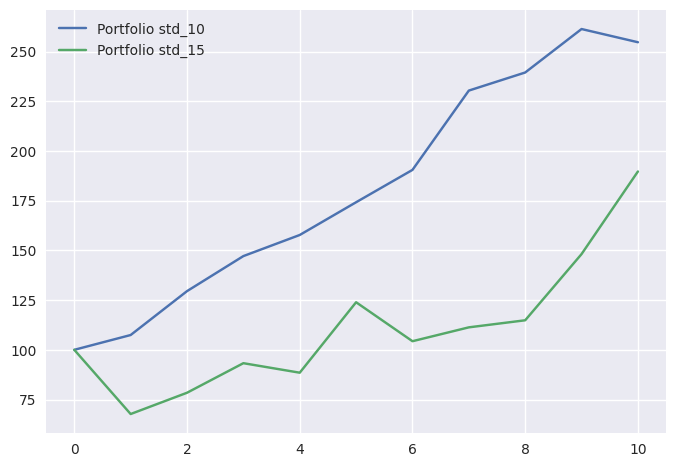

In [87]:
# Não chateando com a parte matemática são estas as funções que vamos usar
def compute_time_series(dataframe):

    #    INPUT: Dataframe of returns
    #    OUTPUT: Growth time= series starting in 100

    return ((np.exp(np.log1p(dataframe).cumsum()))) * 100

def merge_time_series(df_1, df_2, how='outer'):
    df = df_1.merge(df_2, how=how, left_index=True, right_index=True)
    return df

def add_row_on_top(df, new_row):
    df.loc[-1] = new_row  # adding a row
    df.index = df.index + 1  # shifting index
    df = df.sort_index()  # sorting by index
    return df
portfolio_dp_10_df = compute_time_series(pd.DataFrame(portfolio_dp_10))

portfolio_dp_15_df = compute_time_series(pd.DataFrame(portfolio_dp_15))

time_series = merge_time_series(portfolio_dp_10_df, portfolio_dp_15_df)

time_series = add_row_on_top(time_series, [100, 100])

time_series.columns = ['Portfolio std_10', 'Portfolio std_15']

time_series.plot();

Exemplos: https://tinyurl.com/hkv7vkv2